In [16]:
# Dùng thư viện yfinance để tải dataset 
#import yfinance as yf
import numpy as np
import pandas as pd
df = pd.read_csv('STB.csv',header=0, parse_dates=[0], index_col=0)
# Xem data 
df

,Price
Date,
2018-01-02,13400
2018-01-03,13350
2018-01-04,13600
2018-01-05,13600
2018-01-08,14550
...,...
2023-12-15,27100
2023-12-18,26300
2023-12-19,26600


In [17]:
# 1. Các thư viện cần thiết
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [30]:
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [31]:
# 3. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
# 4. Predict test 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [33]:
# 5. Create index for 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[31492.13407338 31508.05115662 31523.96823986 31539.88532309
 31555.80240633 31571.71948956 31587.6365728  31603.55365604
 31619.47073927 31635.38782251 31651.30490575 31667.22198898
 31683.13907222 31699.05615545 31714.97323869 31730.89032193
 31746.80740516 31762.7244884  31778.64157164 31794.55865487
 31810.47573811 31826.39282134 31842.30990458 31858.22698782
 31874.14407105 31890.06115429 31905.97823753 31921.89532076
 31937.812404   31953.72948723]


In [34]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 6. 
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred) * 100
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 4334.288671006436
Testing MAPE: 15.060714216874999
Testing MAE: 3243.1385044596277


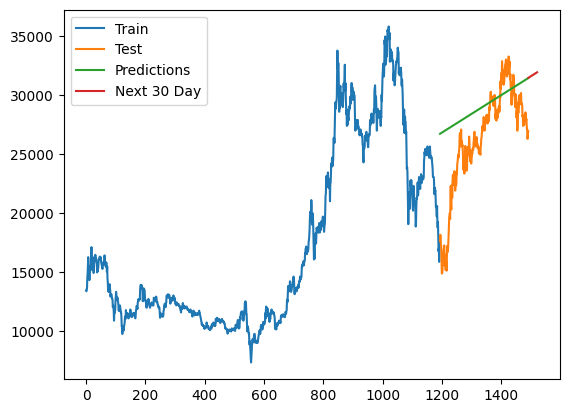

In [35]:
# 7.Draw model
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Predictions','Next 30 Day'])
plt.show()